# Imports

In [48]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [49]:
# import dataset
dataset = pd.read_csv('insurance.csv')

In [50]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [51]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


## Let's plot some data

https://seaborn.pydata.org/examples/index.html

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='age', ylabel='charges'>

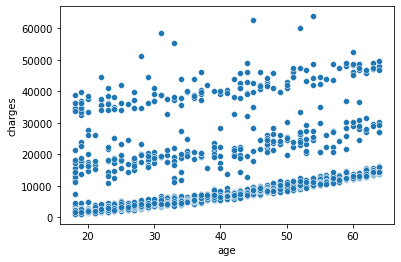

In [52]:
sns.scatterplot(dataset['age'],dataset['charges'])

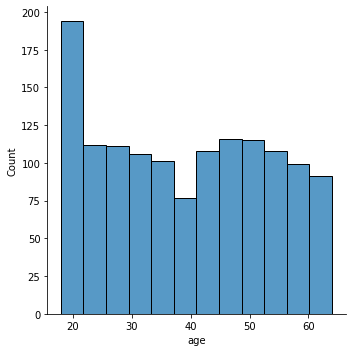

In [53]:
sns.displot(dataset['age'])


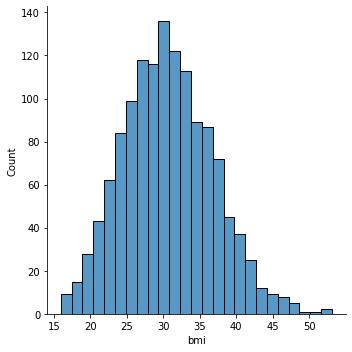

In [54]:
sns.displot(dataset['bmi'])

no     1064
yes     274
Name: smoker, dtype: int64

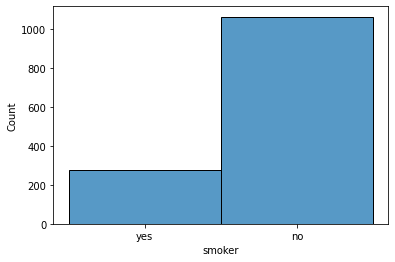

In [55]:
sns.histplot(dataset['smoker'])
dataset['smoker'].value_counts()

southeast    364
southwest    325
northwest    325
northeast    324
Name: region, dtype: int64

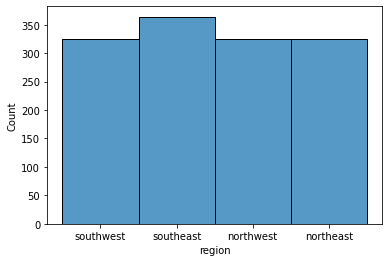

In [56]:
sns.histplot(dataset['region'])
dataset['region'].value_counts()

# Making regression model

## Firstly we need to replace some data in dataset. To make a model all dataset must have no-string values

In [57]:
# 
print('Sex: ', pd.unique(dataset['sex']), '; Smoker: ', pd.unique(dataset['smoker']),'; Region: ', pd.unique(dataset['region']),)

Sex:  ['female' 'male'] ; Smoker:  ['yes' 'no'] ; Region:  ['southwest' 'southeast' 'northwest' 'northeast']


In [58]:
dataset.replace({'sex':{'female': 1, 'male':0}} , inplace = True)
dataset.replace({'smoker':{'yes':1,'no':0}},inplace = True)
dataset.replace({'region':{'southwest':1, 'southeast':2, 'northwest':3, 'northeast':4}},inplace = True)

In [59]:
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520
...,...,...,...,...,...,...,...
1333,50,0,30.970,3,0,3,10600.54830
1334,18,1,31.920,0,0,4,2205.98080
1335,18,1,36.850,0,0,2,1629.83350
1336,21,1,25.800,0,0,1,2007.94500


## Secondly we need to create two datasets form one.
        Subset x includes all dataset EXEPT column 'charges'.
        Subset y includes JUST column 'charges'.

In [60]:
x = dataset.drop(columns = ['charges'])
y = dataset['charges']

## Here we are using "train_test_split" method to divide out datasets into train and test datasets

In [61]:
from sklearn.model_selection import train_test_split
#https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [62]:
x_train, x_test, y_train, y_test = train_test_split(x,y)

In [63]:
from sklearn.linear_model import LinearRegression
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html
from sklearn import metrics
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html

In [64]:
model = LinearRegression() 

In [65]:
model.fit(x_train,y_train)

LinearRegression()

In [66]:
train_predict = model.predict(x_train)

In [67]:
# coefficient of determination R^2 of train subset
r2_train = metrics.r2_score(y_train, train_predict)
r2_train

0.7537940412150589

In [68]:
test_predict = model.predict(x_test)

In [69]:
# coefficient of determination R^2 of test subset
r2_test = metrics.r2_score(y_test, test_predict)
r2_test

0.7378595826486871

## Let's test a model. We will take first line of data set and the model will predict charges.

In [70]:
# the data from table
data = [50,	0,	30.970,	3,	0,	3,	]
index_of_data_in_dataset = 1332
data = np.array(data).reshape(1,-1)
prediction_model1 = model.predict(data)
diff = dataset['charges'][index_of_data_in_dataset] - prediction_model1
print('The prediction result is ', prediction_model1, ' . Charge value in dataset is' , dataset['charges'][index_of_data_in_dataset], ' . The difference between this numbers is, ', diff)

The prediction result is  [12474.59285548]  . Charge value in dataset is 11411.685  . The difference between this numbers is,  [-1062.90785548]


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


## Let's make anouther model. We will use keras API.
https://keras.io/api/

In [71]:
import keras

In [72]:
model2 = keras.Sequential()

In [73]:
model2.add(keras.layers.Dense(200, activation = 'relu'))#making first layer with 200 neurons
model2.add(keras.layers.Dense(550, activation = 'relu'))#making layer with 550 neurons
model2.add(keras.layers.Dense(1))#making exit layer with 1 neurons
model2.compile(optimizer = 'adam', loss = 'mae')
model2.fit(x_train,y_train, batch_size = 20, epochs = 25)

Epoch 1/25
51/51 [==============================] - 1s 3ms/step - loss: 12500.0654
Epoch 2/25
51/51 [==============================] - 0s 3ms/step - loss: 9208.5205
Epoch 3/25
51/51 [==============================] - 0s 3ms/step - loss: 7182.6733
Epoch 4/25
51/51 [==============================] - 0s 5ms/step - loss: 7063.4141
Epoch 5/25
51/51 [==============================] - 0s 5ms/step - loss: 6956.4766
Epoch 6/25
51/51 [==============================] - 0s 5ms/step - loss: 6846.7119
Epoch 7/25
51/51 [==============================] - 0s 4ms/step - loss: 6739.5625
Epoch 8/25
51/51 [==============================] - 0s 3ms/step - loss: 6628.2798
Epoch 9/25
51/51 [==============================] - 0s 6ms/step - loss: 6502.7539
Epoch 10/25
51/51 [==============================] - 0s 3ms/step - loss: 6397.3867
Epoch 11/25
51/51 [==============================] - 0s 3ms/step - loss: 6353.7495
Epoch 12/25
51/51 [==============================] - 0s 3ms/step - loss: 6281.4868
Epoch 13/25


In [74]:
# testing network
data = [50,	0,	30.970,	3,	0,	3,	]#same data as tested in model1
data = np.array(data).reshape(1,-1)
prediction_model2 = model2.predict(data)

1/1 [==============================] - 0s 90ms/step


In [75]:
print('The prediction result is ', prediction_model2, ' . Charge value in dataset is' , dataset['charges'][index_of_data_in_dataset], ' . The difference between this numbers is, ', dataset['charges'][index_of_data_in_dataset]-prediction_model2)

The prediction result is  [[11385.014]]  . Charge value in dataset is 11411.685  . The difference between this numbers is,  [[26.670898]]


In [108]:
# One more testing
ds = [18,	1,	36.850,	0,	0,	2]
ds = np.array(dd).reshape(1,-1)
i = [1334]
ans = int(dataset['charges'][i])
print('Model1:',int(model.predict(ds)),'Model2:',int(model2.predict(ds)),'Real answer:',ans)

1/1 [==============================] - 0s 31ms/step
Model1: 4051 Model2: 1814 Real answer: 2205


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


In [107]:
#new data random data

data = [25, 2, 30, 1, 1, 0]
data = np.array(data).reshape(1,-1)
prediction_model1 = model.predict(data)
prediction_model2= model2.predict(data)
print('Model1 result is: ', prediction_model1, '. Model2 result is: ', prediction_model2, '.')

1/1 [==============================] - 0s 23ms/step
Model1 result is:  [26946.73823099] . Model2 result is:  [[5750.0103]] .


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
